# House Price Prediction --- Machine Learning Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset=pd.read_csv('House_Price_train.csv')

In [3]:
dataset.shape
# Total 1460 Rows & 81 Column Present in this dataset

(1460, 81)

In [4]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Here Id is unique value, it does not have any impact on o/p, So we can drop this column, but we'll handle
# it in feature Engineering

# Exploratory Data Analysis--EDA

Here We are performing, Exploratory Data Analysis, Below are the activity we'll perform in EDA. Missing Values, Numberical Values, Catogirical Values Handling & More

In [6]:
dataset.isnull().sum()
#Checking is there any null values or not

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
feature_missing_val= [feature for feature in dataset.columns if dataset[feature].isnull().sum()>0]
for feature in feature_missing_val:
    print(f'Feature {feature} has {np.round(dataset[feature].isnull().mean(),4)} % Missing Values in dataset')

Feature LotFrontage has 0.1774 % Missing Values in dataset
Feature Alley has 0.9377 % Missing Values in dataset
Feature MasVnrType has 0.0055 % Missing Values in dataset
Feature MasVnrArea has 0.0055 % Missing Values in dataset
Feature BsmtQual has 0.0253 % Missing Values in dataset
Feature BsmtCond has 0.0253 % Missing Values in dataset
Feature BsmtExposure has 0.026 % Missing Values in dataset
Feature BsmtFinType1 has 0.0253 % Missing Values in dataset
Feature BsmtFinType2 has 0.026 % Missing Values in dataset
Feature Electrical has 0.0007 % Missing Values in dataset
Feature FireplaceQu has 0.4726 % Missing Values in dataset
Feature GarageType has 0.0555 % Missing Values in dataset
Feature GarageYrBlt has 0.0555 % Missing Values in dataset
Feature GarageFinish has 0.0555 % Missing Values in dataset
Feature GarageQual has 0.0555 % Missing Values in dataset
Feature GarageCond has 0.0555 % Missing Values in dataset
Feature PoolQC has 0.9952 % Missing Values in dataset
Feature Fence has 

In [8]:
#Now we'll see, the relationship between missing values feature & O/p Feature i.e SalesPrice

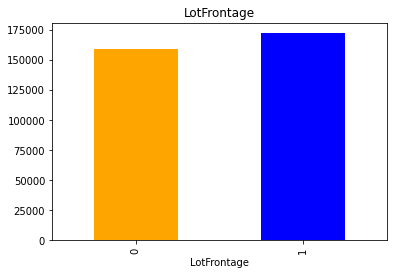

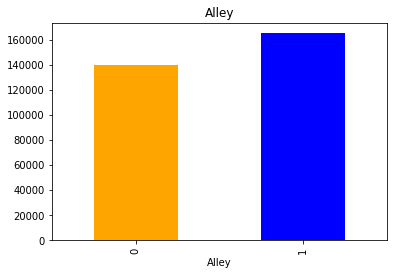

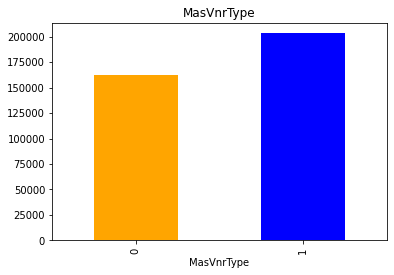

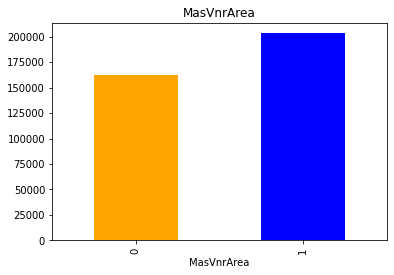

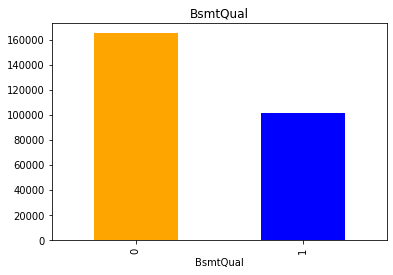

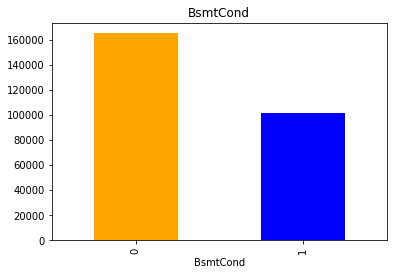

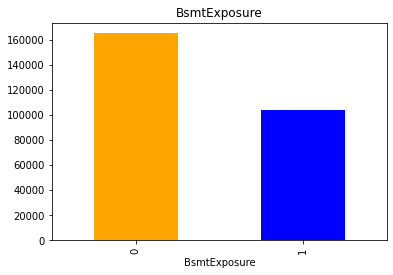

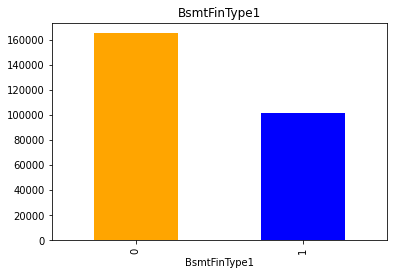

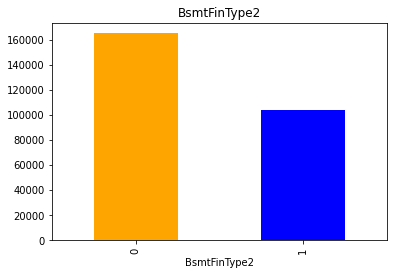

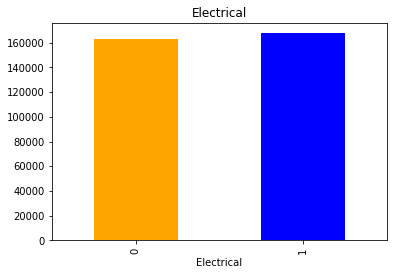

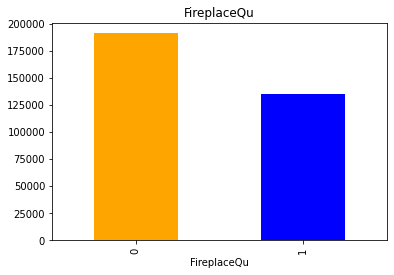

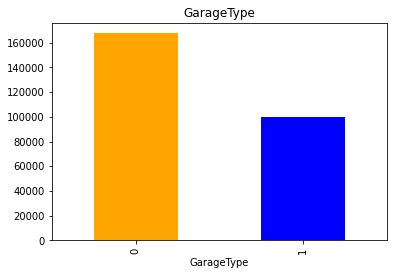

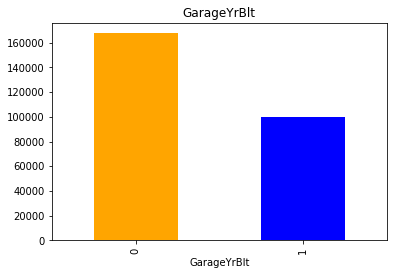

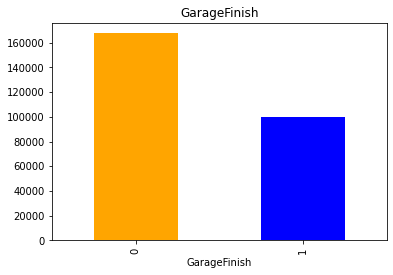

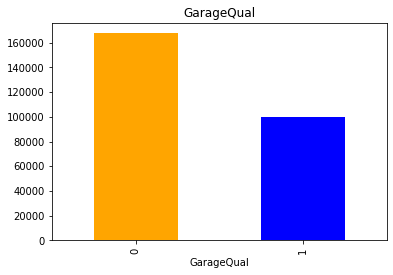

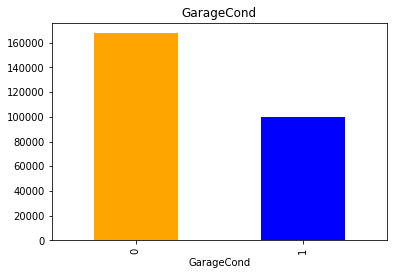

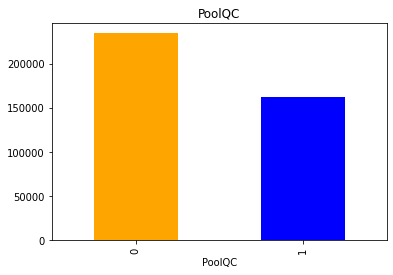

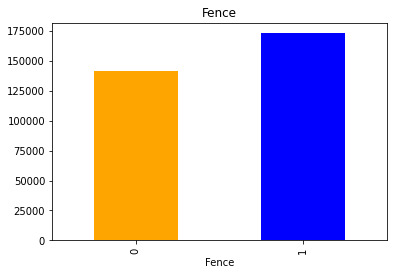

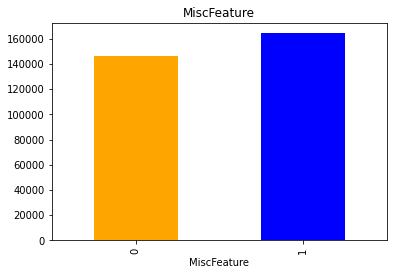

In [9]:
data=dataset.copy() #Creating Copy
for feature in feature_missing_val:
    data[feature]=np.where(data[feature].isnull(),1,0)
    #In above statement we modify the values as we marked Missing values as 1, and non missing value as 0.
    data.groupby(feature)['SalePrice'].median().plot.bar(color=['orange','blue'])
    plt.title(feature)
    plt.show()

Here, Relationshipt between missing values is clearly visible so we can not ignore it, So we have to replace missing values with some meaningfull value, we'll do in feature engineering

# Step 2: Numerical Values

In [13]:
numerical_feature=[feature for feature in dataset.columns if dataset[feature].dtype !='O']

In [14]:
print(len(numerical_feature))
# There are total 38 feature who has Numerical Values

38


In [15]:
dataset[numerical_feature].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


See here we are few temprory variable, Temp variable is like, DataTime Frame,...Here as observed we have 4 feature regarding year

In [16]:
yr_feature=[feature for feature in dataset.columns if 'Year' in feature or 'Yr' in feature]

In [17]:
yr_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [18]:
for feature in yr_feature:
    print(feature,dataset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

In [19]:
# Now Again, we will see the relationship between this yrFeature with SalePrice

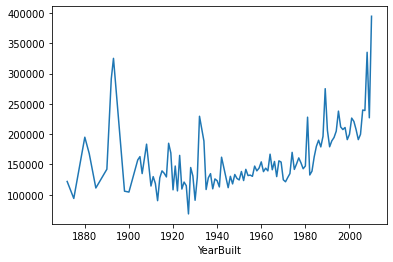

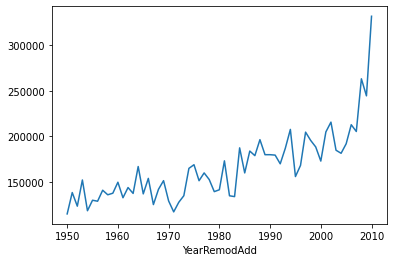

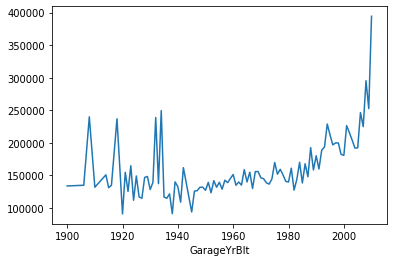

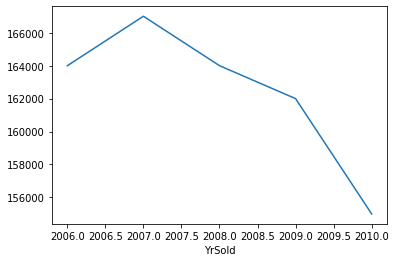

In [20]:
data=dataset.copy()
for feature in yr_feature:
    data.groupby(feature)['SalePrice'].median().plot()
    plt.show()

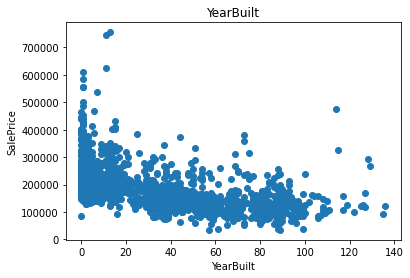

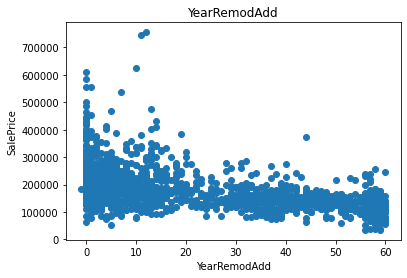

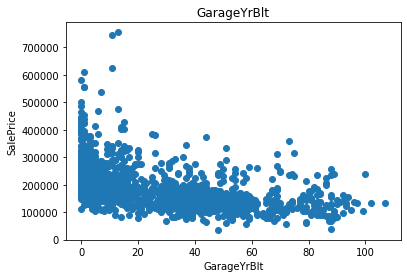

In [21]:
data=dataset.copy()
for feature in yr_feature:
    # data=dataset.copy()
    if feature !='YrSold':
        data[feature]=data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.title(feature)
        plt.ylabel('SalePrice')
        plt.show()


From here, we are getting information like, The newer the house more saleprice it has....we did YrSold - yrBuit/yrremod...and get the age of the house when it was sold.

Now as we know Numerical Values are of 2 Type.....1.Continious values(Any integer, random values) & 2. Descrete values(Integer but values are of a set of perticular value)

In [26]:
des_num_fe=[feature for feature in dataset if len(dataset[feature].unique())<25 and dataset[feature].dtype !='O' and feature not in yr_feature]
print(f'Number Of Descrete Features {len(des_num_fe)}')
# we get total number of Descrete Features, Consider values of cateroies which has less than 25 unique values

Number Of Descrete Features 17


In [27]:
des_num_fe

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [28]:
dataset[des_num_fe].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


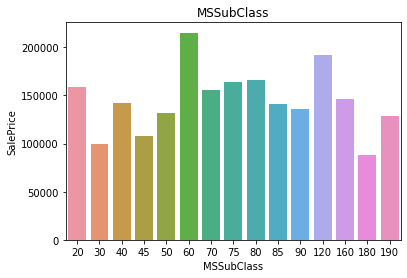

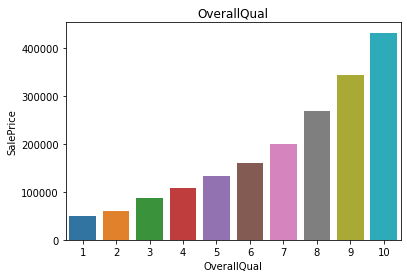

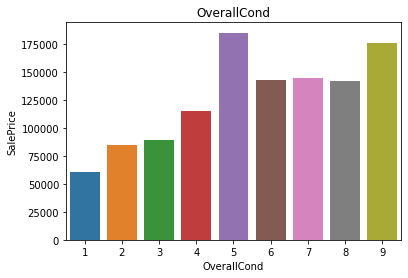

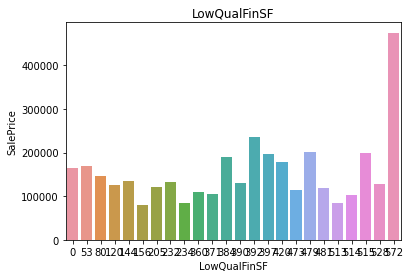

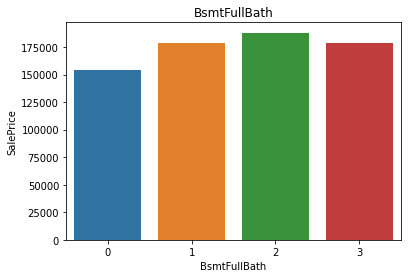

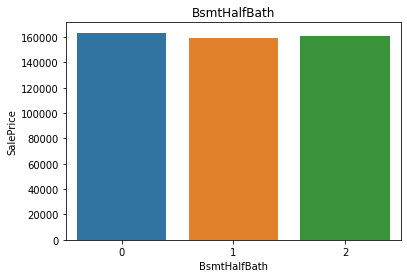

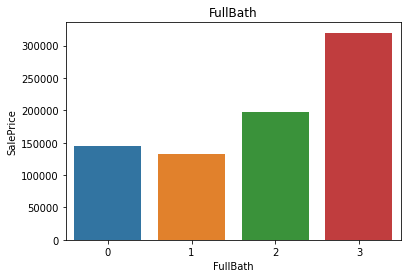

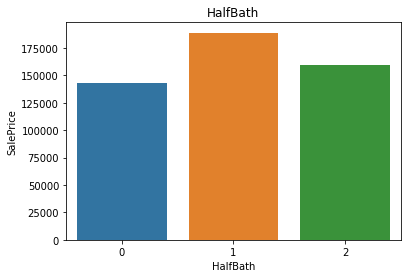

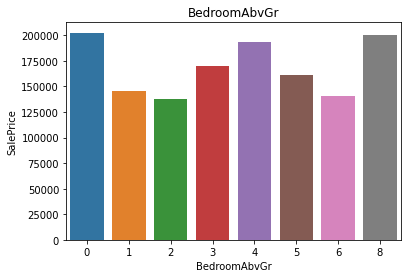

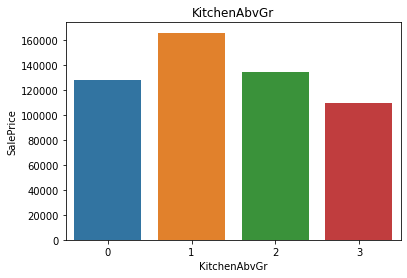

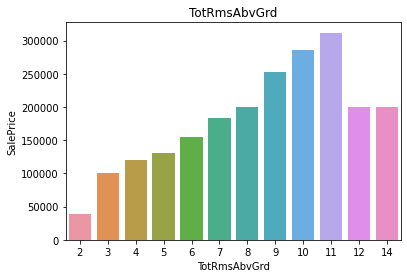

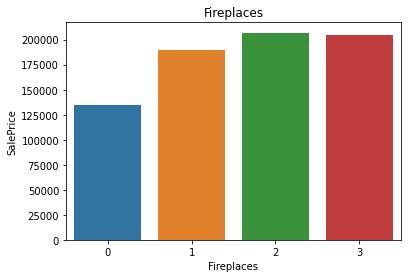

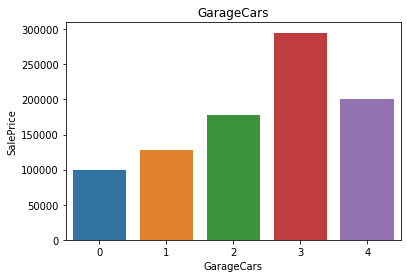

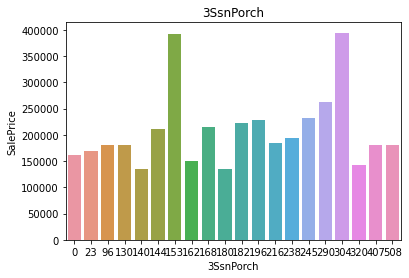

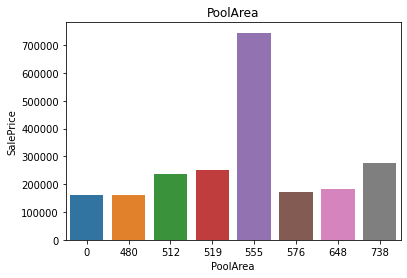

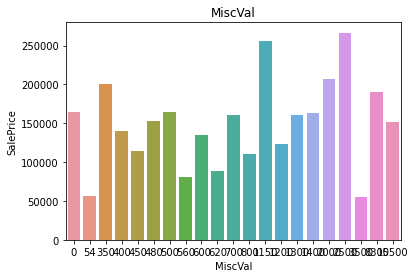

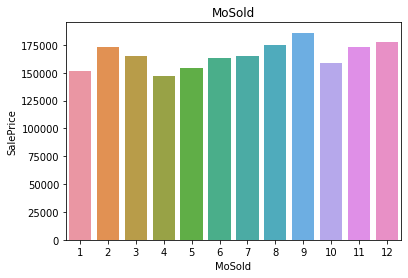

In [29]:
import seaborn as sns
#Lets check the relationship between Descrete Numberical features and saleprice
for feature in dataset[des_num_fe]:
#     dataset.groupby(feature)['SalePrice'].median().plot.bar()
    sns.barplot(x=feature,y='SalePrice', data=data, ci=False, estimator=np.median)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

Here we are getting relationship between descrete numerical Values and saleprice

Now we will check same for continious numerical values

In [30]:
cont_num_fe=[feature for feature in dataset if feature not in des_num_fe+yr_feature+['Id'] and dataset[feature].dtype !='O']
print(f'Continious Numerical Feature are {len(cont_num_fe)}')

Continious Numerical Feature are 16


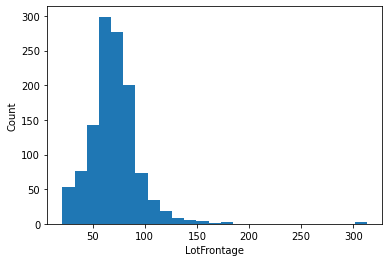

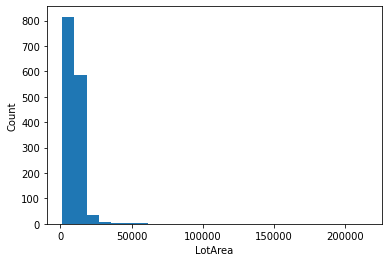

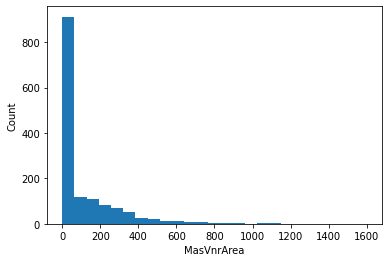

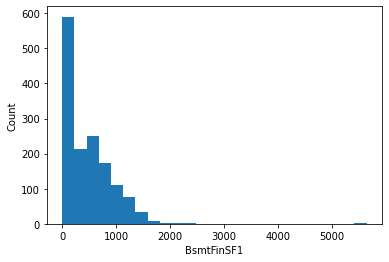

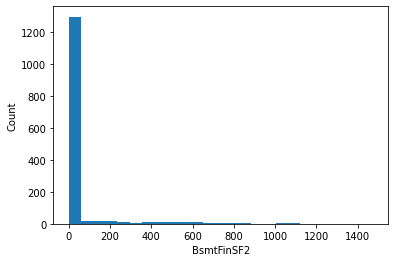

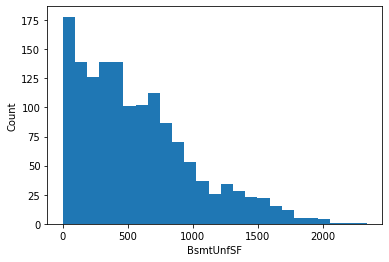

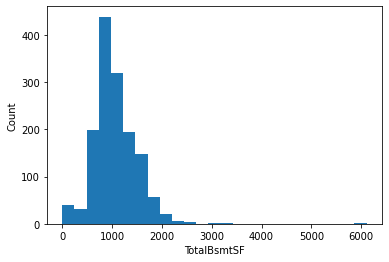

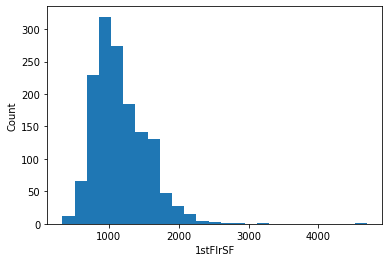

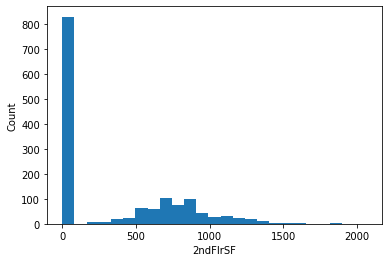

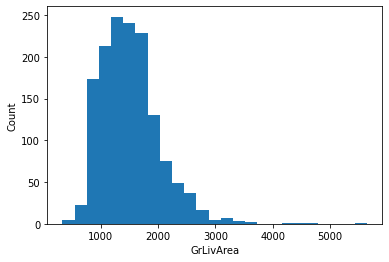

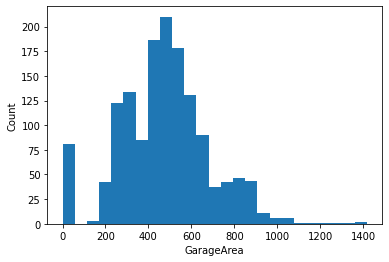

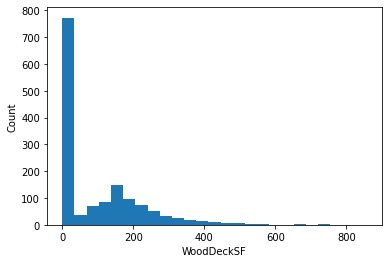

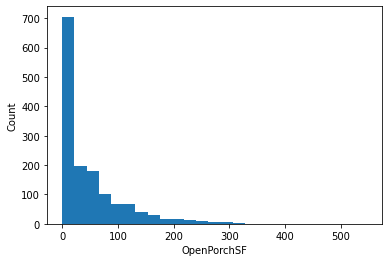

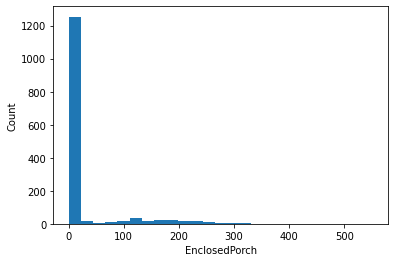

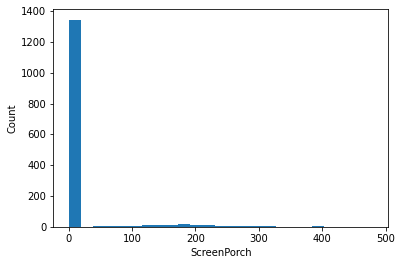

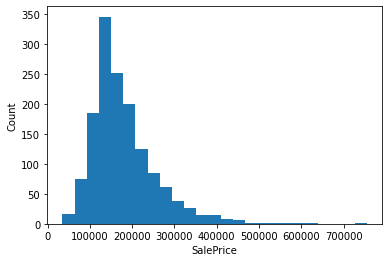

In [31]:
# For continios values, Usually we create Histograms
for feature in cont_num_fe:
    plt.hist(data[feature],bins=25)
#     data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

Here we can observe that our data is sckewed. So we will perform some tatics to normalize it.

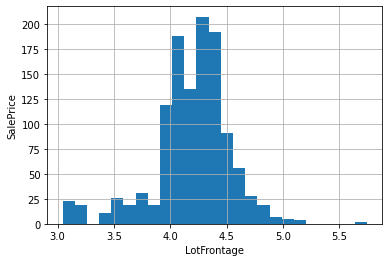

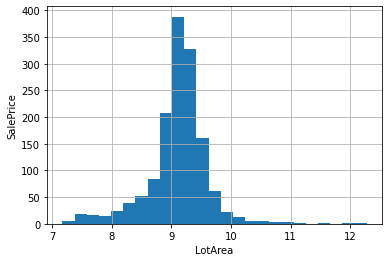

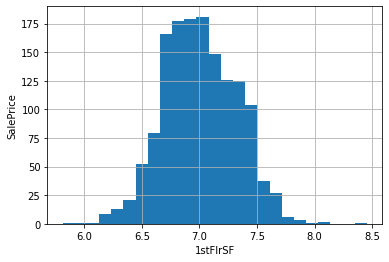

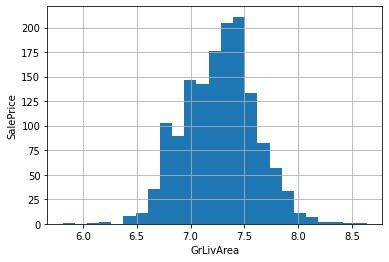

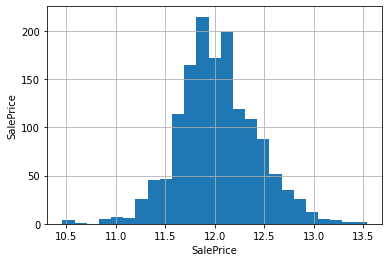

In [32]:
# We are going to transform continiuos feature with log normal distribution
data=dataset.copy()
for feature in cont_num_fe:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
#         data['SalePrice']=np.log(data['SalePrice'])
        data[feature].hist(bins=25)
#         plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()


Now Data is in the form of bell curve, which represent gaussian distribution.

# Outlier

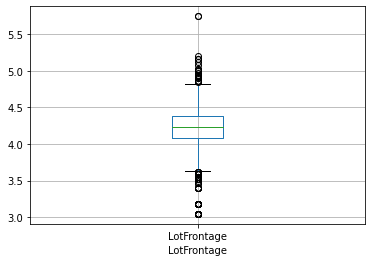

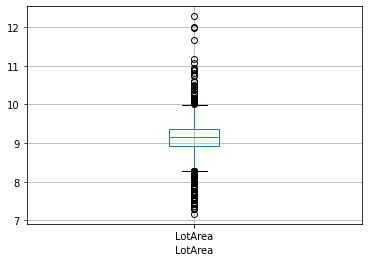

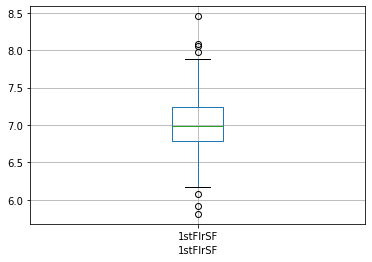

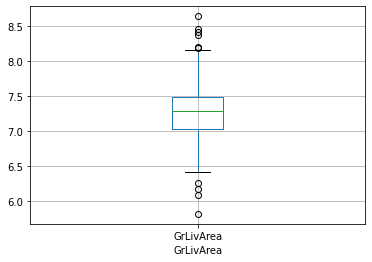

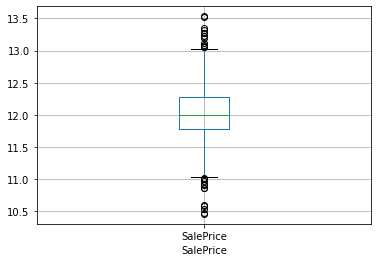

In [33]:
# Finding Outliers in dataset features
data=dataset.copy()
for feature in cont_num_fe:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
#         data['SalePrice']=np.log(data['SalePrice'])
#         plt.boxplot(data[feature])
        data.boxplot(column=feature)
        plt.xlabel(feature)
        plt.show()

# Categorical Variable

In [37]:
data=dataset.copy()
categorical_feature=[feature for feature in data.columns if data[feature].dtype== 'O']

In [38]:
for feature in categorical_feature:
    print(f'There are total {len(data[feature].unique())} unique categorical Features of {feature}')

There are total 5 unique categorical Features of MSZoning
There are total 2 unique categorical Features of Street
There are total 3 unique categorical Features of Alley
There are total 4 unique categorical Features of LotShape
There are total 4 unique categorical Features of LandContour
There are total 2 unique categorical Features of Utilities
There are total 5 unique categorical Features of LotConfig
There are total 3 unique categorical Features of LandSlope
There are total 25 unique categorical Features of Neighborhood
There are total 9 unique categorical Features of Condition1
There are total 8 unique categorical Features of Condition2
There are total 5 unique categorical Features of BldgType
There are total 8 unique categorical Features of HouseStyle
There are total 6 unique categorical Features of RoofStyle
There are total 8 unique categorical Features of RoofMatl
There are total 15 unique categorical Features of Exterior1st
There are total 16 unique categorical Features of Exter

In [39]:
# Now we will see the Relationship between catogirical Feature & SalePrice

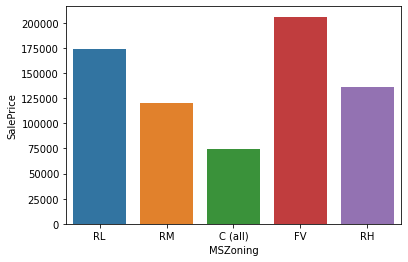

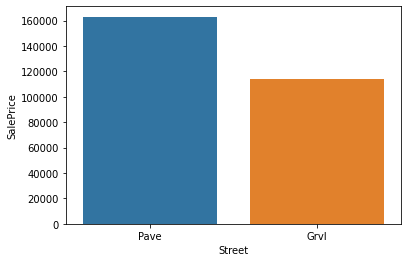

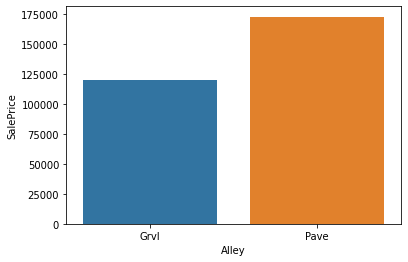

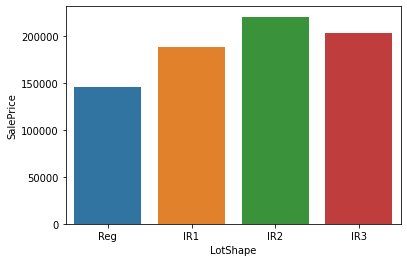

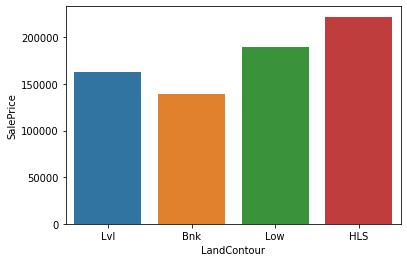

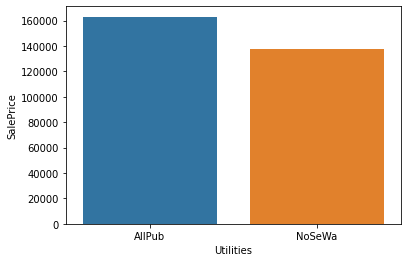

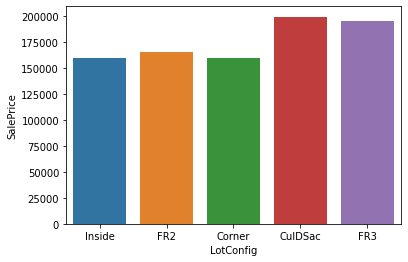

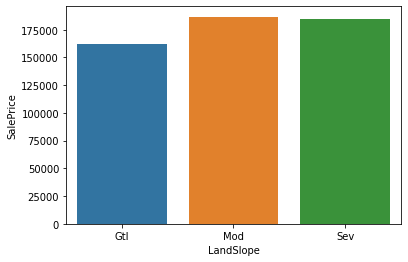

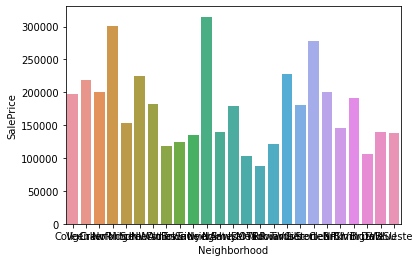

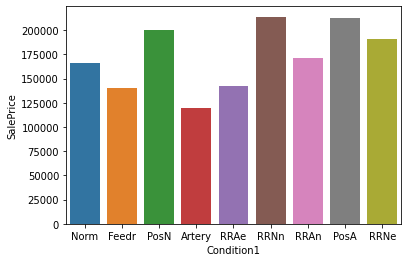

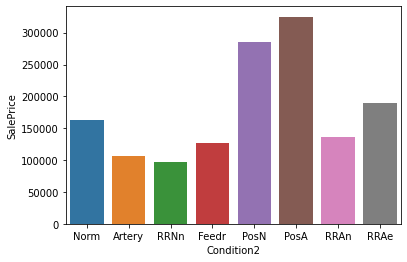

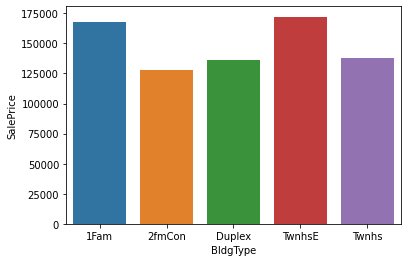

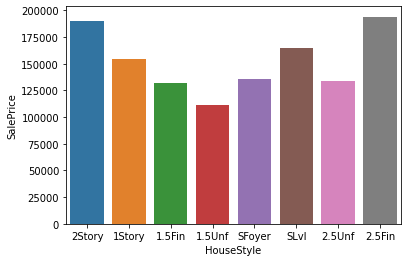

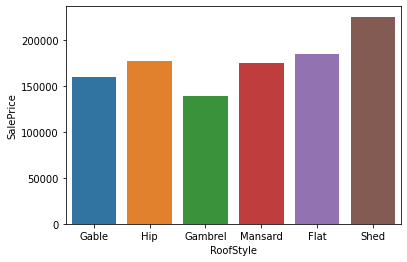

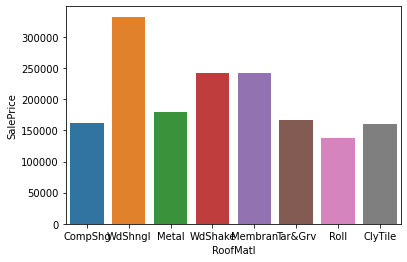

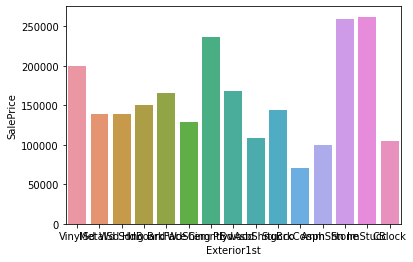

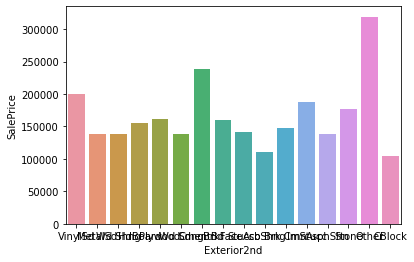

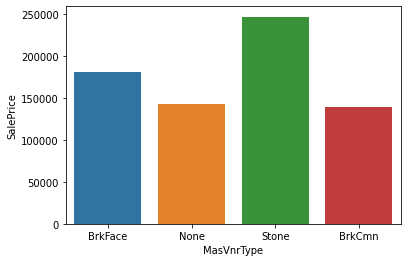

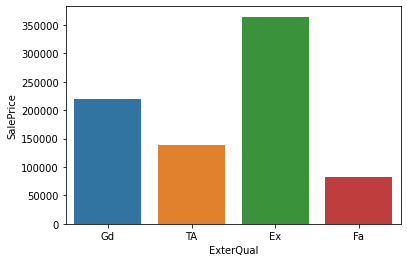

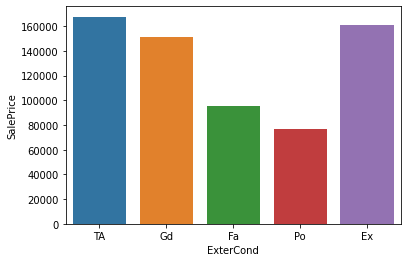

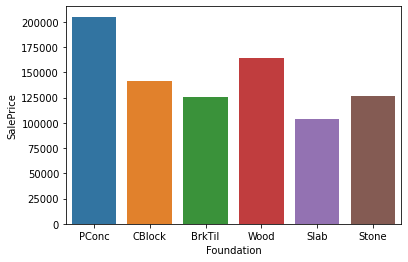

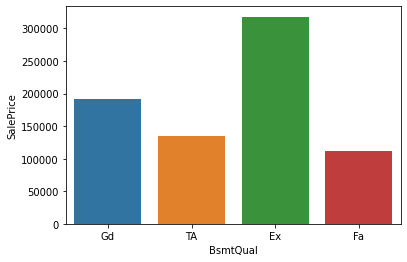

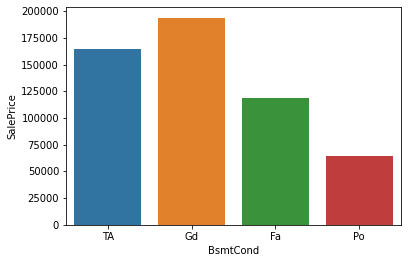

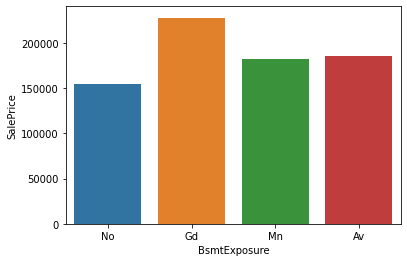

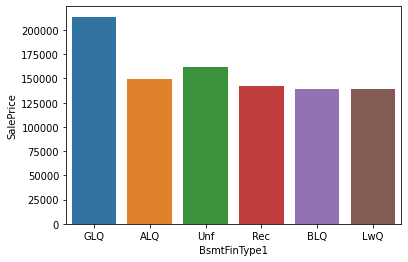

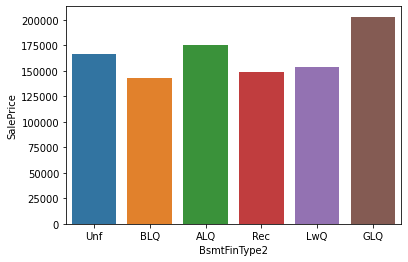

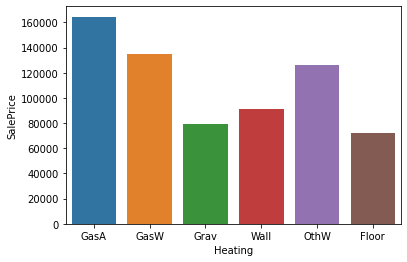

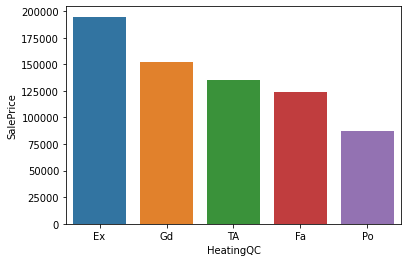

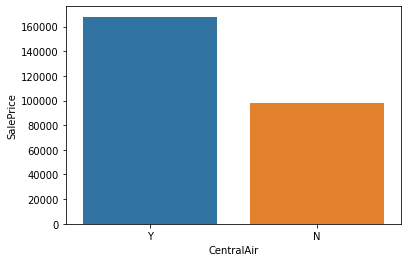

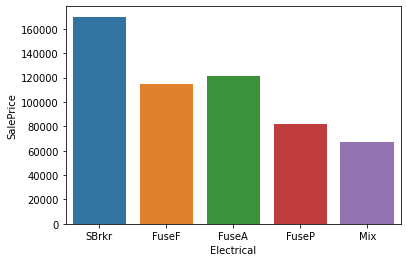

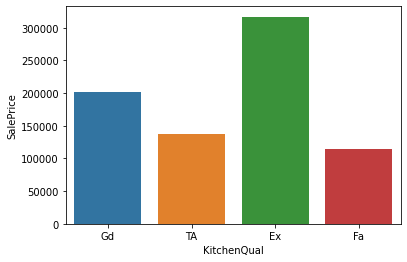

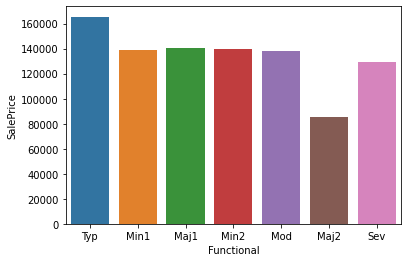

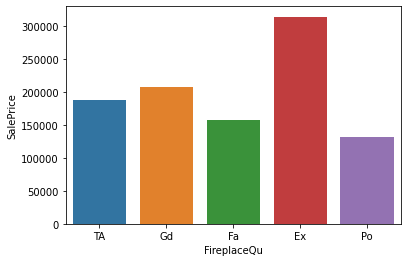

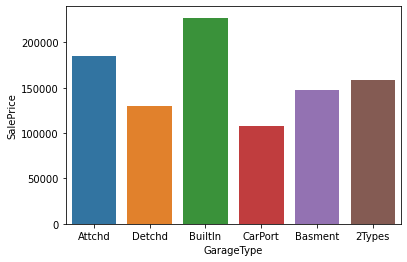

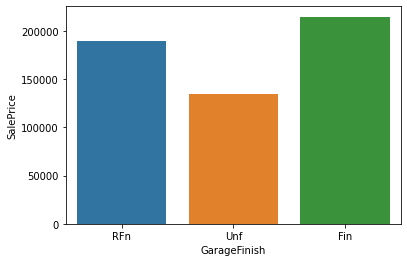

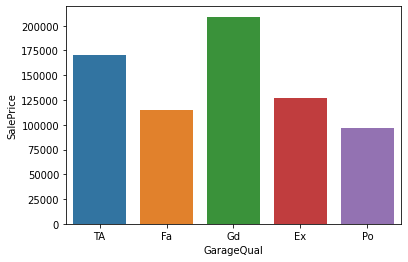

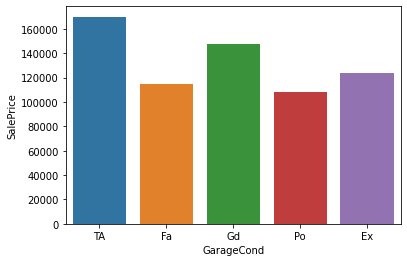

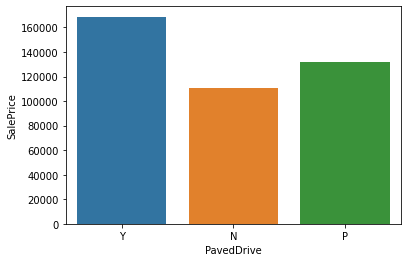

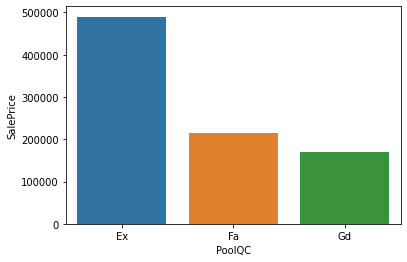

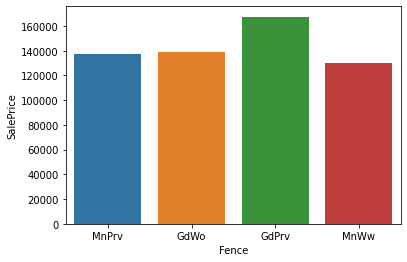

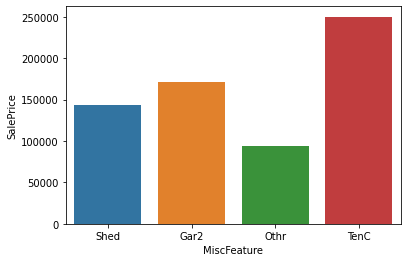

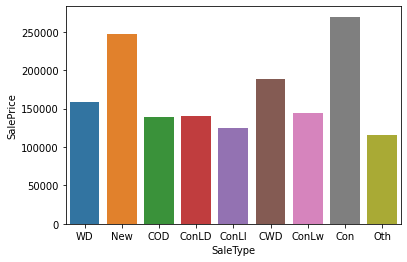

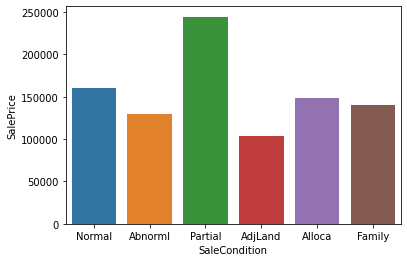

In [40]:
for feature in categorical_feature:
#     data.groupby(feature)['SalePrice'].median().plot.bar()
    sns.barplot(x=data[feature],y=data['SalePrice'],data=data,estimator=np.median,ci=False)
    plt.show()

As we observed, all the feature are playing important role in getting the saleprice of house...In next step we'll perfrom feature engineering & Feature Selection

Exploratory Data Analysis Is completed.